In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import Ridge
reg=Ridge(alpha=0.1)
from sklearn.metrics import mean_absolute_error


In [80]:
weather=pd.read_csv('weatherHistory.csv',index_col='Formatted Date')
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.


In [48]:
weather.drop_duplicates()
weather.shape

(96453, 11)

In [64]:
pd.isnull(weather).sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [88]:
weather['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
0         517
Name: count, dtype: int64

In [86]:
weather['Precip Type']=weather['Precip Type'].fillna(0)

In [90]:
weather['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
0         517
Name: count, dtype: int64

In [92]:
pd.isnull(weather).sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [98]:
weather.dtypes.value_counts()

float64    8
object     3
Name: count, dtype: int64

In [100]:
weather.index

Index(['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200',
       '2006-04-01 02:00:00.000 +0200', '2006-04-01 03:00:00.000 +0200',
       '2006-04-01 04:00:00.000 +0200', '2006-04-01 05:00:00.000 +0200',
       '2006-04-01 06:00:00.000 +0200', '2006-04-01 07:00:00.000 +0200',
       '2006-04-01 08:00:00.000 +0200', '2006-04-01 09:00:00.000 +0200',
       ...
       '2016-09-09 14:00:00.000 +0200', '2016-09-09 15:00:00.000 +0200',
       '2016-09-09 16:00:00.000 +0200', '2016-09-09 17:00:00.000 +0200',
       '2016-09-09 18:00:00.000 +0200', '2016-09-09 19:00:00.000 +0200',
       '2016-09-09 20:00:00.000 +0200', '2016-09-09 21:00:00.000 +0200',
       '2016-09-09 22:00:00.000 +0200', '2016-09-09 23:00:00.000 +0200'],
      dtype='object', name='Formatted Date', length=96453)

In [110]:
weather.index=pd.to_datetime(weather.index,utc=True)

In [114]:
weather.index

DatetimeIndex(['2006-03-31 22:00:00+00:00', '2006-03-31 23:00:00+00:00',
               '2006-04-01 00:00:00+00:00', '2006-04-01 01:00:00+00:00',
               '2006-04-01 02:00:00+00:00', '2006-04-01 03:00:00+00:00',
               '2006-04-01 04:00:00+00:00', '2006-04-01 05:00:00+00:00',
               '2006-04-01 06:00:00+00:00', '2006-04-01 07:00:00+00:00',
               ...
               '2016-09-09 12:00:00+00:00', '2016-09-09 13:00:00+00:00',
               '2016-09-09 14:00:00+00:00', '2016-09-09 15:00:00+00:00',
               '2016-09-09 16:00:00+00:00', '2016-09-09 17:00:00+00:00',
               '2016-09-09 18:00:00+00:00', '2016-09-09 19:00:00+00:00',
               '2016-09-09 20:00:00+00:00', '2016-09-09 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96453, freq=None)

In [112]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.


<Axes: xlabel='Formatted Date'>

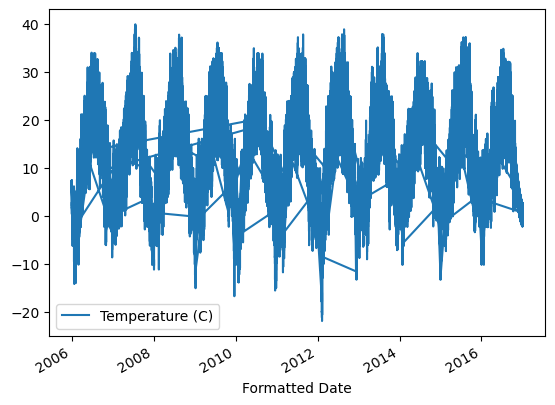

In [134]:
weather[['Temperature (C)']].plot()

In [142]:
weather.index.year.value_counts().sort_index()

Formatted Date
2005       1
2006    8760
2007    8760
2008    8784
2009    8760
2010    8784
2011    8760
2012    8784
2013    8760
2014    8757
2015    8760
2016    8783
Name: count, dtype: int64

In [206]:
weather.insert(11,'target',weather.shift(-1)['Temperature (C)'],True)

In [208]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,target
Formatted Date,,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,9.355556
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,9.377778
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,8.288889
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,8.755556
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,9.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,24.583333
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,22.038889
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,21.522222


In [232]:
weather = weather.sort_index()  
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,target
Formatted Date,,,,,,,,,,,,
2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.,1.161111
2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.,1.666667
2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.,1.711111
2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.,1.183333
2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.,1.205556
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.,0.072222
2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.,-0.233333
2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.,-0.472222


In [242]:
predictor=['Temperature (C)','Humidity','Wind Speed (km/h)']
train=weather.loc[:'2014-12-31 23:00:00+00:00']
test=weather.loc['2015-01-01 00:00:00+00:00':]

In [ ]:
reg.fit(train[predictor],train['target'])

In [248]:
prediction=reg.predict(test[predictor])

In [294]:
test = test.dropna(subset=['target'])
prediction = prediction[~np.isnan(prediction)]
error = mean_absolute_error(test['target'], prediction)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.9348217043372953


In [296]:
combined=pd.concat((test['target'],pd.Series(prediction,index=test.index)),axis=1)
combined.columns=['actual','prediction']

In [298]:
combined

,actual,prediction
Formatted Date,,
2015-01-01 00:00:00+00:00,-11.994444,-12.935631
2015-01-01 01:00:00+00:00,-10.933333,-11.846817
2015-01-01 02:00:00+00:00,-9.705556,-10.785800
2015-01-01 03:00:00+00:00,-9.822222,-9.598157
2015-01-01 04:00:00+00:00,-9.822222,-9.746025
...,...,...
2016-12-31 18:00:00+00:00,0.072222,0.626368
2016-12-31 19:00:00+00:00,-0.233333,0.229059
2016-12-31 20:00:00+00:00,-0.472222,-0.066651


combined.plot()

In [ ]:
def predict(predictor,weather,reg):
    predictor=['Temperature (C)','Humidity','Wind Speed (km/h)']
    train=weather.loc[:'2014-12-31 23:00:00+00:00']
    test=weather.loc['2015-01-01 00:00:00+00:00':]
    reg.fit(train[predictor],train['target'])
    prediction=reg.predict(test[predictor])
    test = test.dropna(subset=['target'])
    prediction = prediction[~np.isnan(prediction)]
    error = mean_absolute_error(test['target'], prediction)
    print(f'Mean Absolute Error: {mae}')
    combined=pd.concat((test['target'],pd.Series(prediction,index=test.index)),axis=1)
    combined.columns=['actual','prediction']
    return error,combined

In [304]:
weather.insert(11,'montly',weather['Temperature (C)'].rolling(30).mean(),True)

In [306]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,montly,target
Formatted Date,,,,,,,,,,,,,
2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.,NaN,1.161111
2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.,NaN,1.666667
2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.,NaN,1.711111
2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.,NaN,1.183333
2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.,NaN,1.205556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.,0.422222,0.072222
2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.,0.332037,-0.233333
2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.,0.237963,-0.472222


In [308]:
weather['montly']=weather['montly'].fillna(0)

In [310]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,montly,target
Formatted Date,,,,,,,,,,,,,
2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.,0.000000,1.161111
2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.,0.000000,1.666667
2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.,0.000000,1.711111
2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.,0.000000,1.183333
2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.,0.000000,1.205556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.,0.422222,0.072222
2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.,0.332037,-0.233333
2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.,0.237963,-0.472222


In [313]:
#1. What type of machine learning problem is this?

In [315]:
#regression problem

In [319]:
# How do the features relate to each other and to the
# weather conditions?

In [321]:
# temp. , Humidity and Wind Speed (km/h) changes one of them infulence the other

In [323]:
#What are the steps involved in preprocessing the
# dataset for machine learning?

In [325]:
#1. load 
#2. handle (clean the data and full the nan value)
#3. Remove Duplicates
#4. Convert Data Types
#5. Sort Data
#6. create target 
#7. split the data in test and train

In [ ]:
# How do we select the best model for our dataset? Hint :
# use different regression models and compare their
# metrics

In [328]:
#1. Try Multiple Models
#2. compare the error


In [330]:
# What metrics should we use to evaluate the
# performance of our weather prediction model?

In [332]:
#1. mean absolute error
#2. mean square error
#3. root mean square error

<Axes: xlabel='Formatted Date'>

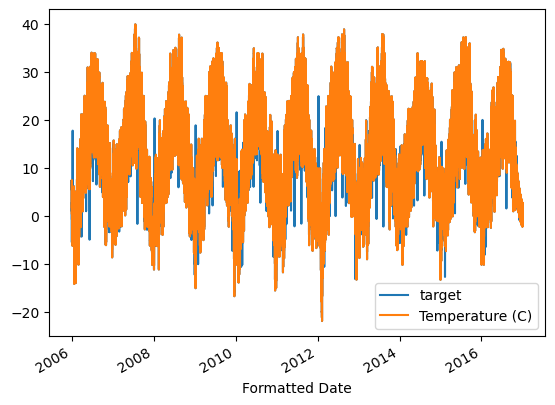

In [342]:
weather[['target','Temperature (C)']].plot()